<a href="https://colab.research.google.com/github/Ichchhya/drowsiness_detection_system/blob/master/drowsypractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('content/drive/') 

In [10]:
import cv2,os
data_path='/content/drive/My Drive/Colab Notebooks/mydataset'
categories=os.listdir(data_path)
labels= [i for i in range(len(categories))]
labels_dict=dict(zip(categories,labels))
print(labels_dict)
print(categories)
print(labels)

{'closed': 0, 'open': 1}
['closed', 'open']
[0, 1]


In [11]:
img_size=100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    try:
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resized=cv2.resize(gray,(img_size,img_size))
      data.append(resized)
      target.append(labels_dict[category])
    except Exception as e:
      print("Exception: ",e)

In [12]:
#normalizing and reshaping data and converting into  numpy array
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
#saving the data
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)
np.save('data',data)
np.save('target',new_target)

In [13]:
import numpy as np
#loading the dataset that we created in previous code
data=np.load('data.npy')
target=np.load('target.npy')

In [14]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#first layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second layer
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third layer
model.add(Flatten())
model.add(Dropout(0.5))

#fourth layer
model.add(Dense(50,activation='relu'))

#output layer
model.add(Dense(2,activation='softmax'))

#this compiles the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
#this splits the whole data into test and train data by 90% and 10%
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target= train_test_split(data,target,test_size=0.1)

In [17]:
cd /content/drive/My Drive/Colab Notebooks/models

/content/drive/My Drive/Colab Notebooks/models


In [18]:
#check point gives the model information about when the model should save itself and saves only the best model
#history contains the trained model infor and splits 20% of data for validation
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.6418WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
33/33 [==============================] - 2s 60ms/step - loss: 0.6886 - accuracy: 0.6418 - val_loss: 0.6243 - val_accuracy: 0.7137
Epoch 2/20
33/33 [==============================] - 1s 45ms/step - loss: 0.3364 - accuracy: 0.8525 - val_loss: 0.3131 - val_accuracy: 0.8779
Epoch 3/20
33/33 [==============================] - 2s 46ms/step - loss: 0.2481 - accuracy: 0.9119 - val_l

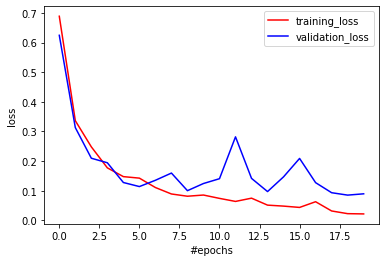

In [19]:
#plotting validation loss and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'b',label='validation_loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

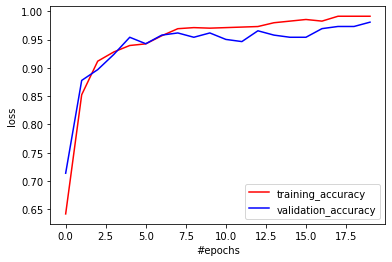

In [20]:
#plotting validation accuracy and accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation_accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#evaluating the test data  
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9863
[0.037744972854852676, 0.9863013625144958]


In [23]:
#loading the model on new_model variable
import tensorflow as tf
new_model=tf.keras.models.load_model('model-019.model')

In [55]:
#predicting on test data
predictions= new_model.predict([test_data])

In [ ]:
print(predictions)

In [59]:
#predicting from testdata index 5 and printing category 0 for closed and 1 for open

import numpy as np
print(np.argmax(predictions[6]))

0


In [60]:
cv2_imshow(test_data[0])

IndexError: ignored

In [28]:
#loading the model and storing labels and colors for each category in dictionery

from keras.models import load_model
import cv2
import numpy as np

model=load_model('/content/drive/My Drive/Colab Notebooks/models/model-019.model')

label_dict={0:'open',1:'closed'}
color_dict={0:(0,255,0),1:(0,0,255)}


In [ ]:
#prediction using webcam and face and eye classification

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_frontalface_alt.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_eye.xml')
capture=cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/videos/mom.mp4')

# capture=cv2.VideoCapture(0)

while True:
  ret, img = capture.read()

  if img is not None:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else:
    print("Frame not found")
    exit(1)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for x,y,w,h in faces:
    cv2.rectangle(img, (x, y),(x+w, y+h),(255,0,0),2)
    roi_gray= gray[y:y+h , x:x+w]
    roi_color= img[y:y+h , x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for ex,ey,ew,eh in eyes:
      roi_gray_eyes=gray[ey:ey+eh, ex:ex+ew]
      roi_color_eyes=img[ey:ey+eh, ex:ex+ew]
      resized=cv2.resize(roi_gray_eyes,(100,100))
      normalized= resized/255.0
      reshaped= np.reshape(normalized,(1,100,100,1))
      result=model.predict(reshaped)

      label=np.argmax(result,axis=1)[0]
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),color_dict[label],2)
      cv2.rectangle(roi_color,(ex,ey-40),(ex+ew,ey),color_dict[label],-1)
      # cv2.putText(roi_color,labels_dict[label],(ex,ey-10),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,255,255),2)
      print(label)
      
  cv2_imshow(img)
  key = cv2.waitKey(1)
  if key == 27:
  	break
cap.release()
cv2.destroyAllWindows()



In [ ]:
#prediction by detecting eye

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# face_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_frontalface_alt.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_eye.xml')
# capture=cv2.VideoCapture('/content/drive/My Drive/Colab Notebooks/videos/mom.mp4')

image=cv2.imread('/content/drive/My Drive/Colab Notebooks/videos/images/both/wink1.jpeg') 
eyes= eye_cascade.detectMultiScale(image)
for ex,ey,ew,eh in eyes:
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  roi_gray_eyes=gray[ey:ey+eh, ex:ex+ew]
  roi_color_eyes=image[ey:ey+eh, ex:ex+ew]
  resized=cv2.resize(gray,(100,100))
  normalized= resized/255.0
  reshaped= np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)
  label=np.argmax(result,axis=1)[0]
  cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),color_dict[label],2)  
    # cv2.rectangle(roi_color_eyes,(ex,ey-40),(ex+ew,ey),color_dict[label],-1)
print(label)
cv2_imshow(image)
cv2.waitKey(1)
cv2.destroyAllWindows()



1
1
1


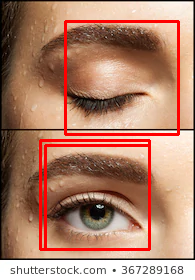

In [54]:
#prediction by classifying left and right eye

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

left_eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_lefteye_2splits.xml')
right_eye_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade/haarcascade_righteye_2splits.xml')
image=cv2.imread('/content/drive/My Drive/Colab Notebooks/videos/images/both/openandclosed2.jpg')
left_eyes= left_eye_cascade.detectMultiScale(image)
right_eyes= right_eye_cascade.detectMultiScale(image)

for ex,ey,ew,eh in left_eyes:
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  roi_gray_eyes=gray[ey:ey+eh, ex:ex+ew]
  roi_color_eyes=image[ey:ey+eh, ex:ex+ew]
  resized=cv2.resize(gray,(100,100))
  normalized= resized/255.0
  reshaped= np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)
  label=np.argmax(result,axis=1)[0]
  cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),color_dict[label],2) 
  print(label)

for ex,ey,ew,eh in right_eyes:
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  roi_gray_eyes=gray[ey:ey+eh, ex:ex+ew]
  roi_color_eyes=image[ey:ey+eh, ex:ex+ew]
  resized=cv2.resize(gray,(100,100))
  normalized= resized/255.0
  reshaped= np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)
  label=np.argmax(result,axis=1)[0]
  cv2.rectangle(image,(ex,ey),(ex+ew,ey+eh),color_dict[label],2) 
  print(label)


cv2_imshow(image)
cv2.waitKey(1)
cv2.destroyAllWindows()



